# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Andriansyah]
- **Email:** [andrianrian263@gmail.com]
- **ID Dicoding:** [andrian25]

## Menentukan Pertanyaan Bisnis

- Apa Faktor-faktor utama yang mempengaruhi jumlah sepeda yang disewa setiap harinya ?
- Bagaimana tren penyewaan sepeda selama setahun ? Apakah ada terjadi pola musiman dalam penyewaan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [191]:
#Menampilkan 5 baris pertama dari DataFrame day_df
day_df = pd.read_csv("https://raw.githubusercontent.com/Andriansyah088/ProyekAnalisisData/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dari tabel diatas kita mendapatkan suatu informasi dari data paling teratas yang dimana kita dapatkan dengan menggunakan fungsi head didalamnya terdapat beberapa informasi terkait tangal,bulan,musim, cuaca dan banyak lagi

In [192]:
#Menampilkan 5 baris pertama dari DataFrame hour.csv
hour_df = pd.read_csv("https://raw.githubusercontent.com/Andriansyah088/ProyekAnalisisData/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Di dalam tabel diatas kita bisa mendapatkan beberapa pengetahuan data seperti tanggal , musim , bulan dan banyak lagi dari penyewaan sepeda disini data yang ditampilkan sebanyak 5 karena sesuai dengan perintah .head() untuk menampilkan data paling atas 


### Assessing Data

In [193]:
#Mengidentifikasi tipe data yang terdapat pada tabel day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Pada tabel diatas kida mendapati daftar kolom beserta dengan tipe datanya tetapi terdapat kesalahan tipe data pada kolom dteday atau hari dimana bertipe data object seharusnya bertipe data datetime

In [194]:
#Mengidentifikasi terjadinya missing value pada tabel day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Bisa kita lihat disini setelah dilakukan penelusuran terhadap missing value tidak ditemukan kesalahan yang artinya data pada tabel day_df itu aman dari missing value

In [195]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Bisa kita lihat disini setelah dilakukan penelusuran terhadap duplikasi data tidak ditemukan adanya data yang sama atau data ganda sehingga tabel ini aman dari duplikasi data

In [196]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [197]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dengan fungsi describe kita bisa melihat suatu statistik sederhana dari tabel day_df dan hour_df yang berisi count(jumlah), mean, std, nilai min quartil 1,2 dan3 serta nilai max

In [198]:
#Mengidentifikasi tipe data yang tedapat pada tabel hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- terdapat kesalahan tipe data pada kolom dteday atau hari dimana bertipe data object seharusnya bertipe data datetime

In [199]:
#Mengidentifikasi terjadinya missing value pada tabel day_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Ini adalah suatu metode untuk memeriksa apakah terjadinya missing value pada suatu tabel data

In [200]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- ini merupakan suatu metode untuk memeriksa apakah terdapat suatu duplikat yang terjadi pada row atau baris data

In [201]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dengan fungsi describe kita bisa melihat suatu statistik sederhana dari tabel hour_df yang berisi count(jumlah), mean, std, nilai min quartil 1,2 dan3 serta nilai max

### Cleaning Data

Pada proses sebelumnya kita tidak mendapati kesalahan pada missing value maupun duplicated data tetapi mendapat permasalahan di tipe data pada salah satu kolom yaitu dteday nah disini kita akan mengubah tipe datanya yang tadinya object akan menjadi datetime

In [202]:
#Memperbaiki tipe data pada kolom dteday di tabel day_df
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [203]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- bisa kita lihat pada data diatas pada kolom dteday sudah kita perbaiki yang sebelumnya adalah sebuah object sekarang menjadi datetime

In [204]:
#Memperbaiki tipe data pada kolom dteday di tabel hour_df
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [205]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- bisa kita lihat pada data diatas pada kolom dteday sudah kita perbaiki yang sebelumnya adalah sebuah object sekarang menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [206]:
day_df.groupby(by="temp").agg({
    "registered":"sum",
    "casual":"sum",
    "cnt":"sum"
})

,registered,casual,cnt
temp,,,
0.059130,888,93,981
0.096522,836,150,986
0.097391,1330,86,1416
0.107500,2273,95,2368
0.127500,1456,73,1529
...,...,...,...
0.834167,4634,829,5463
0.838333,3176,670,3846
0.848333,2825,562,3387


**Insight:**
- Dari tabel diatas kita bisa melihat kita mengelompokkan data berdasarkan temperatur dimana semakin besar suhunya semakin banyak pula yang menyewa sepeda bisa kita lihat dari cnt atau total penyewa sepeda, Karena pada suhu yang rendah kebanyakan orang sepertinya untuk keluar saja cukup malas
- Dan juga bisa kita lihat pada kolom registered terlihat kestabilan data dimana selalu naik ketika terjadi  kenaikan temperatur hal inilah yang bisa kita manfaatkan untuk menarik pelanggan lebih untuk menjadi member dengan memberikan promo pada saat tertentu ketika terjadi kenaikan temperature

In [207]:
day_df.groupby(by="season").agg({
    "registered":"sum",
    "casual":"sum",
    "cnt":"sum"
})

,registered,casual,cnt
season,,,
1,410726,60622,471348
2,715067,203522,918589
3,835038,226091,1061129
4,711831,129782,841613


In [208]:
total_visitor_day = day_df["casual"].sum() + day_df["registered"].sum()
print(total_visitor_day)

3292679


**Insight:**

Data diatas merupakan total pengunjung pada tiap tabel hour dan day yaitu registered dan casual dimana walaupun keduanya 
memiliki total data yang berbeda ini hanya membedakan adalah detail di tabel hour yang mana menghitung data setiap jam sedangkan tabel day menghitung harian

In [209]:
hour_analysis = day_df.groupby('temp')['cnt'].agg(['mean', 'sum']).reset_index()
hour_analysis.columns = ['temp', 'Average Rentals', 'Total Rentals']
print("\nAnalisis Penyewaan Berdasarkan Jam:")
print(hour_analysis)


Analisis Penyewaan Berdasarkan Jam:
         temp  Average Rentals  Total Rentals
0    0.059130            981.0            981
1    0.096522            986.0            986
2    0.097391           1416.0           1416
3    0.107500           2368.0           2368
4    0.127500           1529.0           1529
..        ...              ...            ...
494  0.834167           5463.0           5463
495  0.838333           3846.0           3846
496  0.848333           3387.0           3387
497  0.849167           3285.0           3285
498  0.861667           4840.0           4840

[499 rows x 3 columns]


**Insight:**

  Ini merupakan suatu analisa penyewaan berdasarkan suhu yang dimana bisa kita lihat terjadi lonjakan setiap terjadi kenaikan suhu

In [210]:
all_df = day_df
all_df.to_csv("dashboard/all_data.csv", index=False)

**Insight:**

ini merupakan suatu metode untuk menyimpan data yang sudah dibersihkan ke all_df untuk nantinya dipaparkan pada suatu dashboard

## Visualization & Explanatory Analysis

### Pertanyaan 1: - Apa Faktor-faktor utama yang mempengaruhi jumlah sepeda yang disewa setiap harinya ?

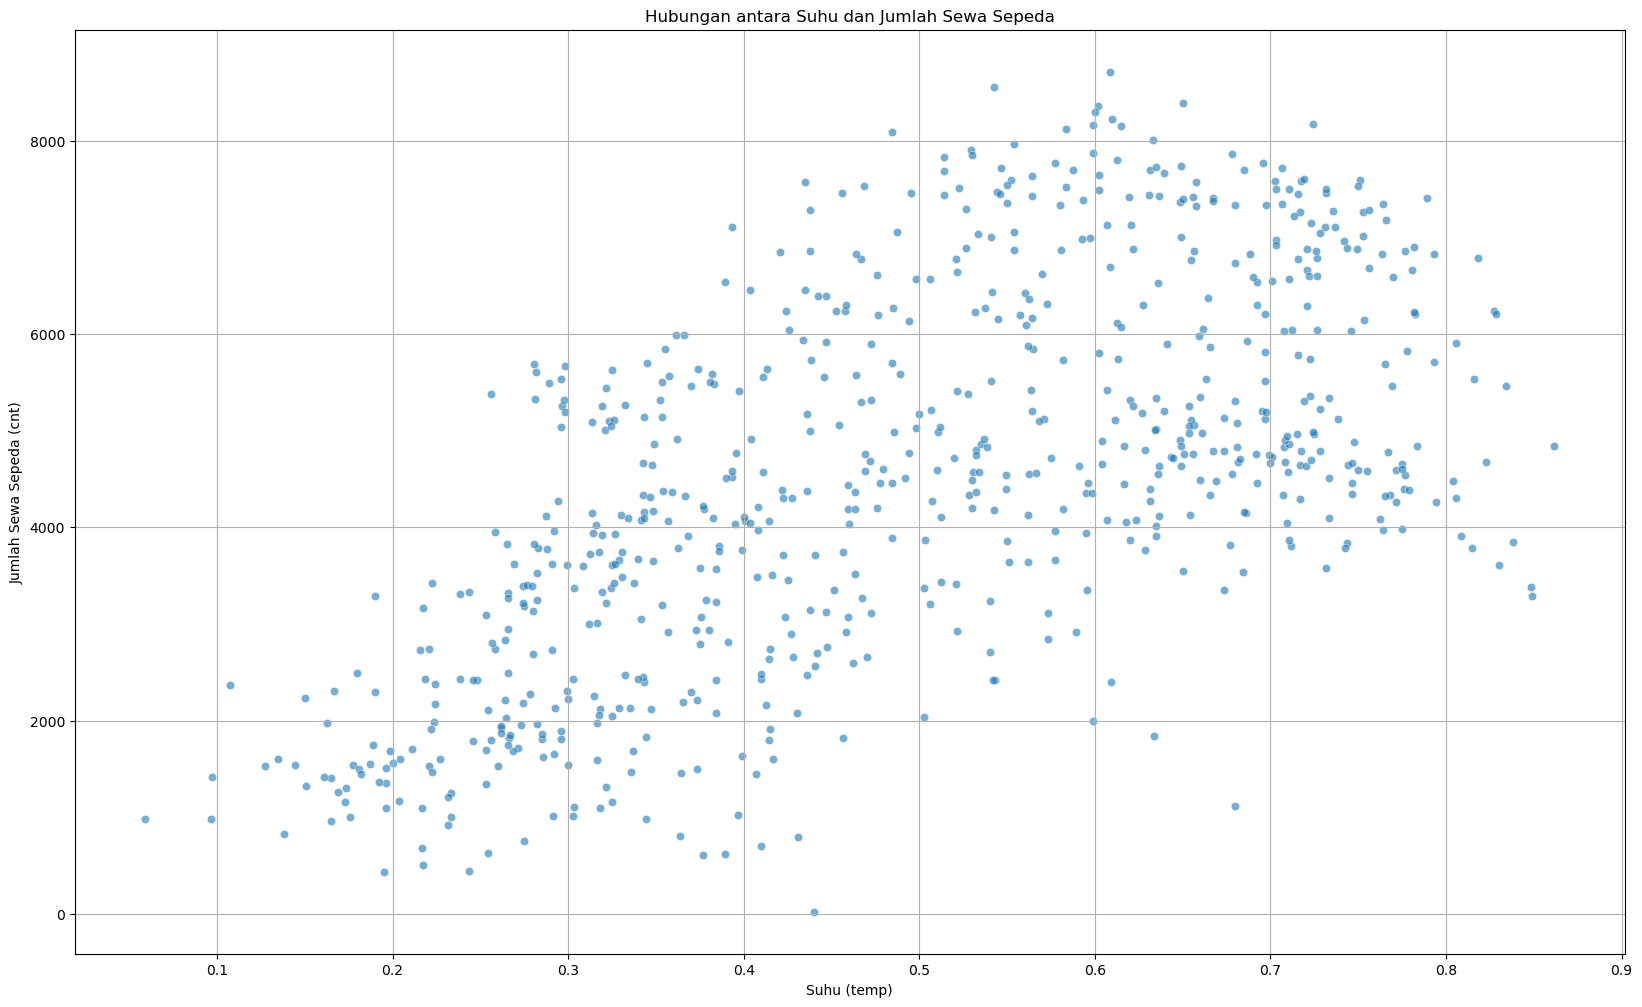

In [211]:
# Visualisasi hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(20, 12))
sns.scatterplot(x='temp', y='cnt', data=all_df, alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Sewa Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')
plt.grid()
plt.show()

**Insight:**
- Tren positif dimana suhu yang lebih tinggi biasanya terjadi juga pelonjakan jumlah penyewaan sepeda lebih banyak
- ada juga beberapa data yang outlier di data tersebut
- Terlihat adanya kelompok pada titik pada suhu tertenu, ini bisa mengindikasikan adanya pola musiman

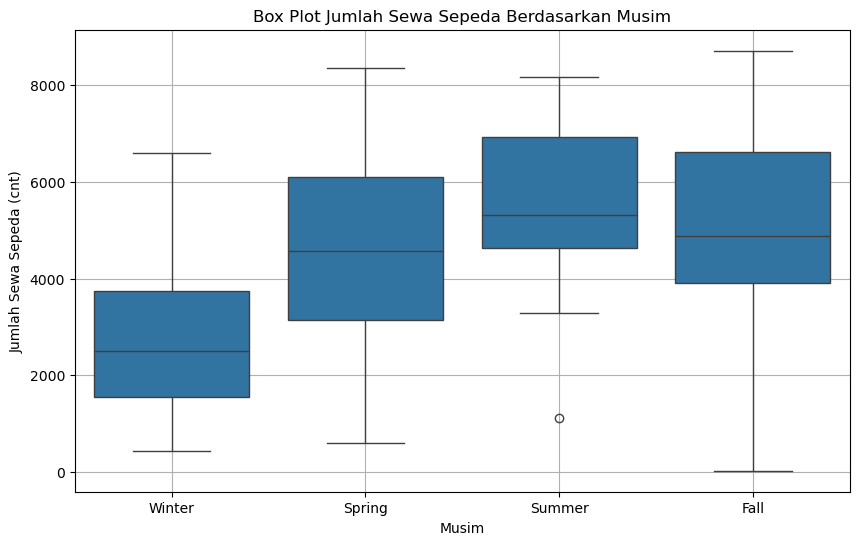

In [212]:
# Visualisasi hubungan antara musim dan jumlah penyewaan
all_df['dteday'] = pd.to_datetime(all_df['dteday'])

# Tambahkan kolom bulan dan musim
all_df['month'] = all_df['dteday'].dt.month
all_df['season'] = all_df['month'].map({
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
    5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
})


plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=all_df)
all_df['season'] = all_df['season'].map(season_map)
plt.title('Box Plot Jumlah Sewa Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda (cnt)')
plt.grid()
plt.show()

**Insight:**
- Perbandingan median : musim dengan median tertinggi menunjukkan waktu penyewaan paling banyak
- Variabilitas : lebar box menunjukkan fluktuasi jumlah penyewaan dalam masing-masing musim
- titik diluar whiskers menandakan kejadian penyewaan yang ekstrem atau bisa dikatakan sebagai outlier
- Pengaruh musiman : perbedaan signifikan antar musim menandakan pengaruh besar terhadap pola penyewaan

### Pertanyaan 2: - Bagaimana tren penyewaan sepeda selama setahun ? Apakah ada terjadi pola musiman dalam penyewaan sepeda ?

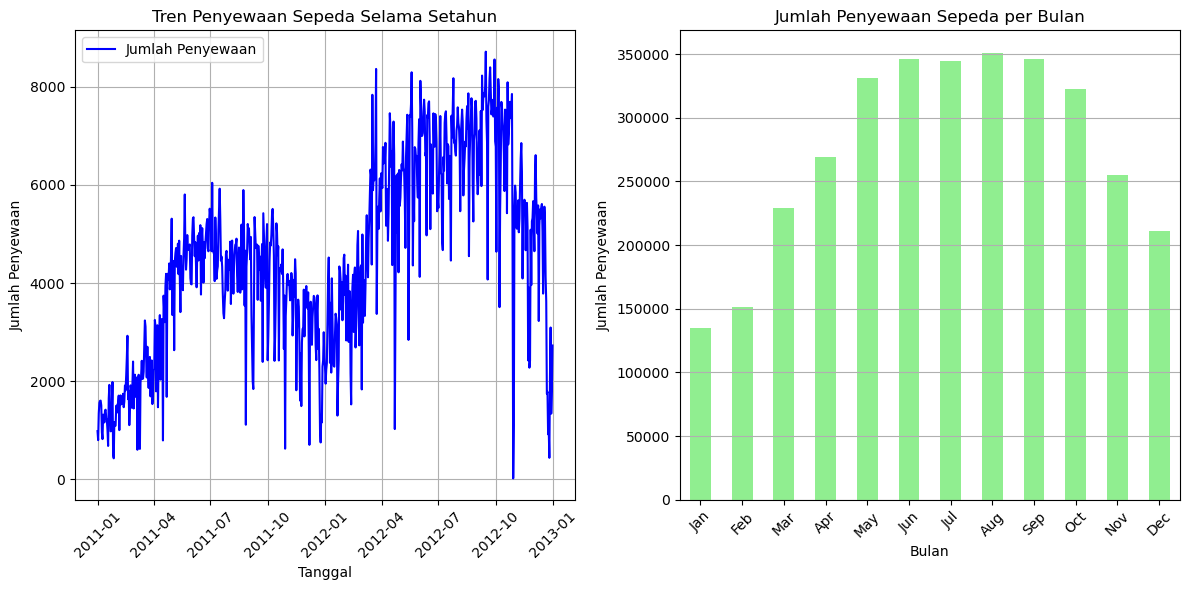

In [213]:
# Menghitung total penyewaan per bulan
monthly_rentals = all_df.groupby('month')['cnt'].sum()

# Menghitung total penyewaan per musim
seasonal_rentals = all_df.groupby('season')['cnt'].sum()

# Visualisasi tren penyewaan sepeda sepanjang tahun
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(all_df['dteday'], all_df['cnt'], label='Jumlah Penyewaan', color='blue')
plt.title('Tren Penyewaan Sepeda Selama Setahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Visualisasi penyewaan per bulan
plt.subplot(1, 2, 2)
monthly_rentals.plot(kind='bar', color='lightgreen')
plt.title('Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')

# Menampilkan grafik
plt.tight_layout()
plt.show()

# 

**Insight:**
- Penyewaan tinggi di musim panas dan rendah di musim dingin
- Bulan juni hingga Agustus cenderung memiliki jumlah penyewaan tertinggi
- Suhu sangat berhubungan dengan peningkatan penyewaan sepeda yang terjadi

## Analisis Lanjutan (Opsional)

## Conclusion

- Jumlah sepeda yang disewa setiap harinya dipengaruhi oleh dua faktor utama yaitu suhu yang menunjukkan hubungan positif dengan penyewaan, dan musim yang mempengaruhi pola penyewaan dengan musim panas sebagai yang paling tinggi
- Penyewaan sepeda menunjukkan pola musiman yang jelas, dengan puncak tertinggi pada bulan-bulan musim panas dan penurunan signifikan di musim dingin. Ini menunjukkan bahwa cuaca mempengaruhi penggunaan sepeda, sehingga pemilik usaha sewa sepeda dapat merancang strategi promosi yang sesuai dengan musiman